# Linear Regression - Example Project

## Imports
** Import pandas, numpy, matplotlib, and seaborn, and set %matplotlib inline **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data & Take a Look

In [9]:
customers = pd.read_csv("Ecommerce Customers")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [28]:
# checking if we have any NA values
customers.isnull().values.any()

False

## Data Manipulation/Clean-up

In [10]:
# let's drop the un-used columns. 
# this isn't necessary, but it's good practice for us

customers.drop(['Email', 'Address', 'Avatar'], axis = 1)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
5,33.871038,12.026925,34.476878,5.493507,637.102448
6,32.021596,11.366348,36.683776,4.685017,521.572175
7,32.739143,12.351959,37.373359,4.434273,549.904146
8,33.987773,13.386235,37.534497,3.273434,570.200409
9,31.936549,11.814128,37.145168,3.202806,427.199385


In [29]:
# no categorical data. Let's create a column for gender
# since python is picky about characters for linear models, we'll do this as a binary dummy variable
customers['Male'] = np.random.choice([0, 1], size=(len(customers)), p=[0.6, 0.4])
customers['Male'] = customers['Male'].astype('category')

In [12]:
# just to make it interesting, let's change their spending behaviors a bit
customers['Yearly Amount Spent'] = np.where(customers['Male'] == 1, 
                                            customers['Yearly Amount Spent'] * 0.75, 
                                            customers['Yearly Amount Spent'])

customers['Length of Membership'] = np.where(customers['Male'] == 1, 
                                            customers['Length of Membership'] * 1.10, 
                                            customers['Length of Membership'])

customers['Time on App'] = np.where(customers['Male'] == 1, 
                                            customers['Time on App'] * 0.85, 
                                            customers['Time on App'])

In [6]:
# check that it worked
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
Male                    500 non-null category
dtypes: category(1), float64(5), object(3)
memory usage: 31.9+ KB


In [13]:
customers['Yearly Amount Spent'].groupby(customers['Male']).describe()

,count,mean,std,min,25%,50%,75%,max
Male,,,,,,,,
0,295.0,507.332123,79.618095,256.670582,460.844778,505.771140,555.627381,765.518462
1,205.0,365.831864,58.217814,199.564756,330.002061,369.078789,405.919938,516.926775


## Exploratory Data Analysis

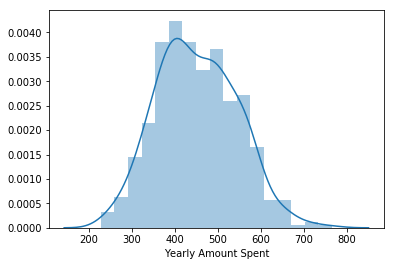

In [10]:
sns.distplot(customers['Yearly Amount Spent'])

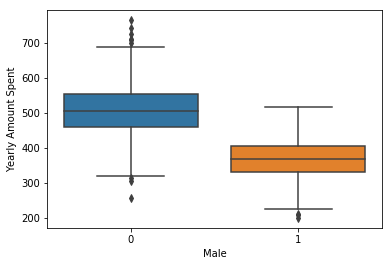

In [14]:
sns.boxplot(x = 'Male', y = 'Yearly Amount Spent', data = customers)

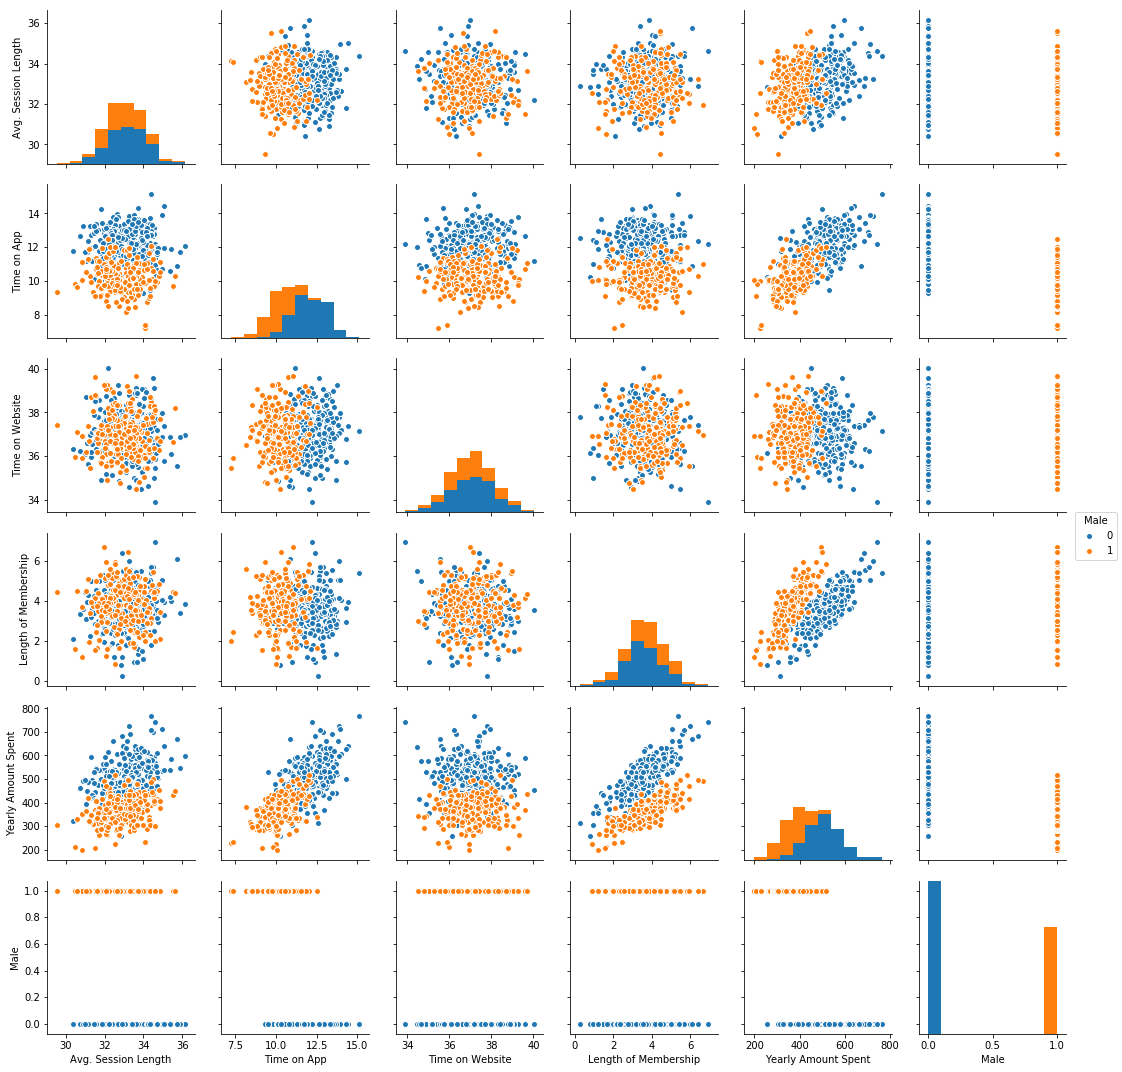

In [15]:
sns.pairplot(customers, hue = 'Male')

**Create a linear model plot of  Yearly Amount Spent vs. Length of Membership. **

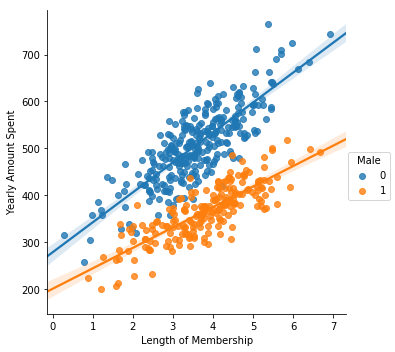

In [16]:
sns.lmplot(x ='Length of Membership',y ='Yearly Amount Spent', hue = 'Male', data = customers)

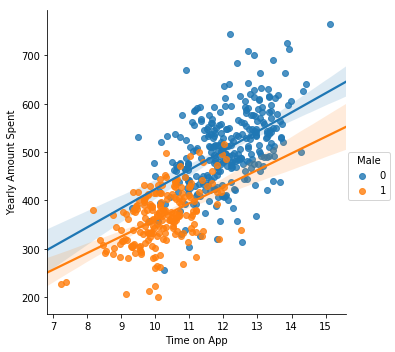

In [17]:
sns.lmplot(x ='Time on App',y ='Yearly Amount Spent', hue = 'Male', data = customers)

## Training and Testing Data

In [19]:
y = customers['Yearly Amount Spent']

In [18]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Male']]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

## Training the Model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predicting Test Data

In [25]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

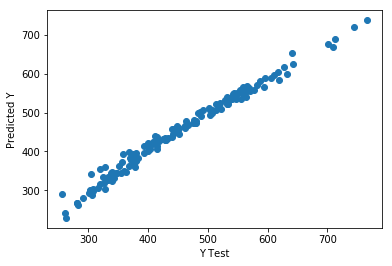

In [26]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# our model is doing very well! 
# it would be a completely straight line with the points on top of each other if it was perfect.

## Evaluating the Model

In [27]:
from sklearn import metrics

print('MSE:', round(metrics.mean_squared_error(y_test, predictions), 2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))
print('R2:', round(metrics.explained_variance_score(y_test, predictions), 2))

MSE: 212.28
RMSE: 14.57
R2: 0.98


## Residuals

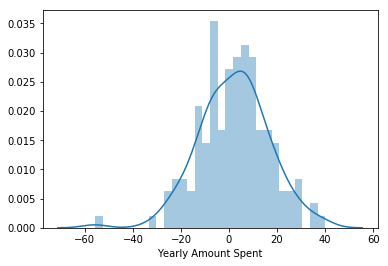

In [50]:
sns.distplot((y_test-predictions),bins=30)

# looks pretty normal. Plus we know the model is fairly good, so no worries

## Interpretation

In [28]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,23.178897
Time on App,36.485866
Time on Website,-1.309815
Length of Membership,51.220525
Male,-76.518207


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 23.18 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 36.49 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **decrease of 1.31 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 51.22 total dollars spent**.
- Holding all other features fixed, being **Male** is associated with an **decrease of 76.51 total dollars spent**.